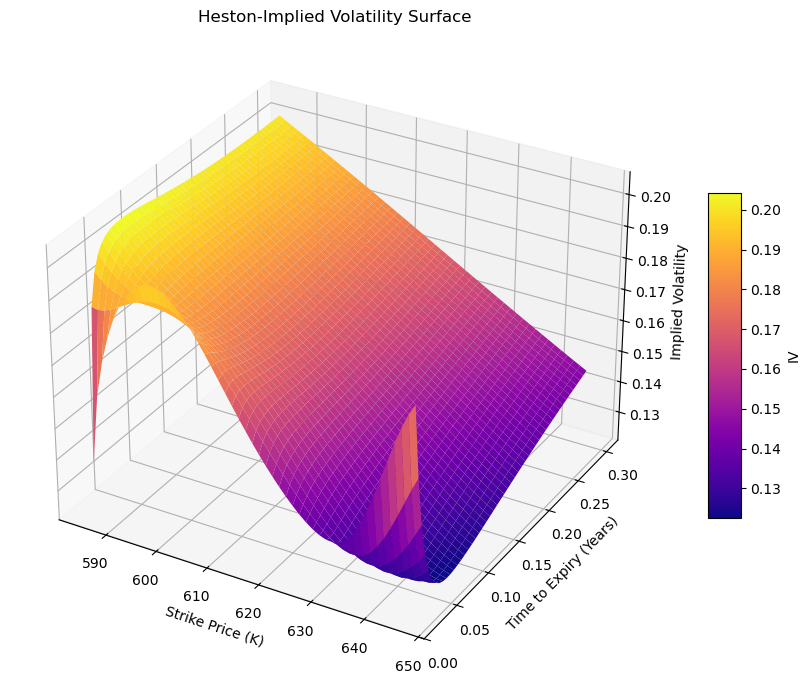

In [6]:
# Cell 10: Plot Heston‐Implied Volatility Surface

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from important_functions import heston_call, implied_volatility_call

# 1) Use your calibrated Heston parameters
initial_variance      = 0.0271
mean_reversion_rate   = 3.0218
long_term_variance    = 0.0574
vol_of_vol            = 0.7936
correlation           = -0.8076
S0 = 615.79
RISK_FREE_RATE = 0.01

# 2) Define a grid of maturities and moneyness
T_values = np.linspace(0.02, 0.3, 50)      # times to expiry from ~1 week to 6 months
m_values = np.linspace(0.95, 1.05, 50)       # moneyness from 90% to 110%
T_grid, m_grid = np.meshgrid(T_values, m_values, indexing='ij')
K_grid = m_grid * S0                       # strike grid

# 3) Compute implied vol at each grid point
IV_grid = np.zeros_like(K_grid)
for i, T in enumerate(T_values):
    for j, m in enumerate(m_values):
        K = K_grid[i,j]
        # price under Heston
        price_h = heston_call(
            S0, K,
            initial_variance,
            RISK_FREE_RATE,
            T,
            mean_reversion_rate,
            long_term_variance,
            vol_of_vol,
            correlation
        )
        # invert to Black–Scholes vol
        IV_grid[i,j] = implied_volatility_call(
            price_h, S0, K, T, RISK_FREE_RATE
        )

# 4) Plot the 3D surface
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(
    K_grid, T_grid, IV_grid,
    cmap='plasma', edgecolor='none'
)
ax.set_xlabel('Strike Price (K)')
ax.set_ylabel('Time to Expiry (Years)')
ax.set_zlabel('Implied Volatility')
ax.set_title('Heston‐Implied Volatility Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='IV')
plt.tight_layout()
plt.show()
